<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
training_set  = pd.read_csv("Train_Titanic.csv")

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survived = training_set[training_set['Survived']==1]
no_survived = training_set[training_set['Survived']==0]
print("No. of passengers who survived", len(survived))

No. of passengers who survived 342


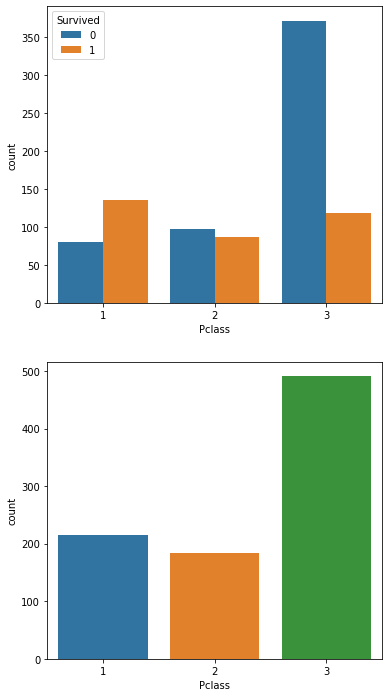

In [ ]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Pclass',data=training_set,hue='Survived')
plt.subplot(212)
sns.countplot(x='Pclass',data=training_set)

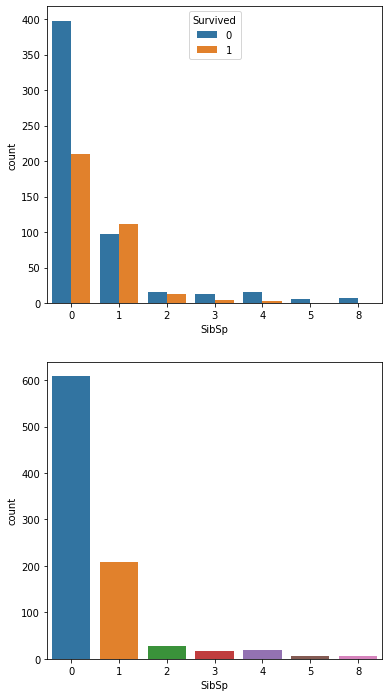

In [ ]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='SibSp',data=training_set,hue='Survived')
plt.subplot(212)
sns.countplot(x='SibSp',data=training_set)

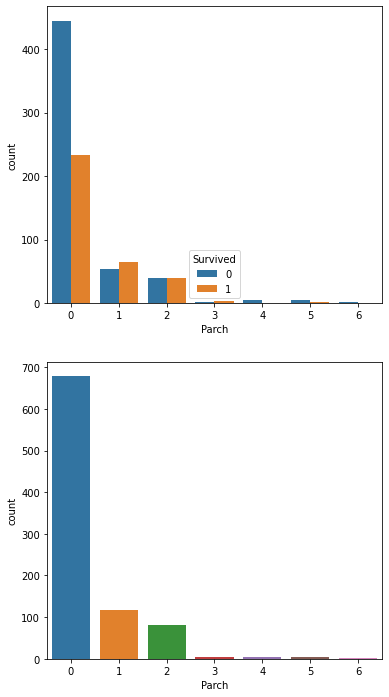

In [ ]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Parch',data=training_set,hue='Survived')
plt.subplot(212)
sns.countplot(x='Parch',data=training_set)

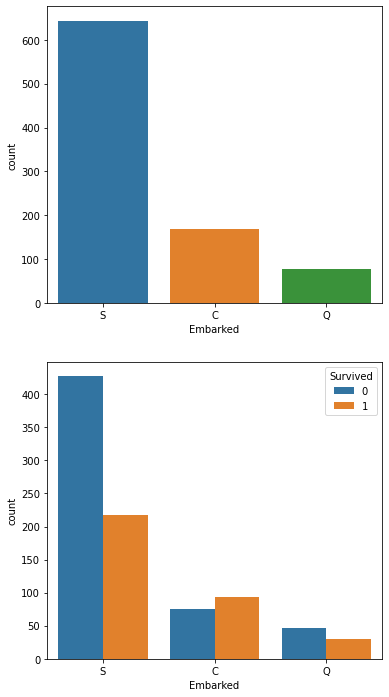

In [ ]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Embarked',data=training_set)
plt.subplot(212)
sns.countplot(x='Embarked',data=training_set,hue='Survived')

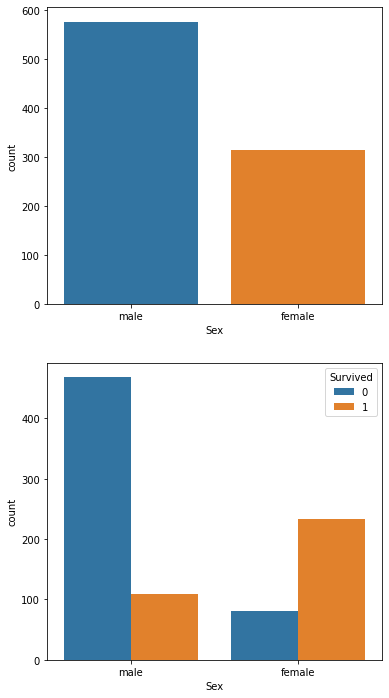

In [ ]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Sex',data=training_set)
plt.subplot(212)
sns.countplot(x='Sex',data=training_set,hue='Survived')

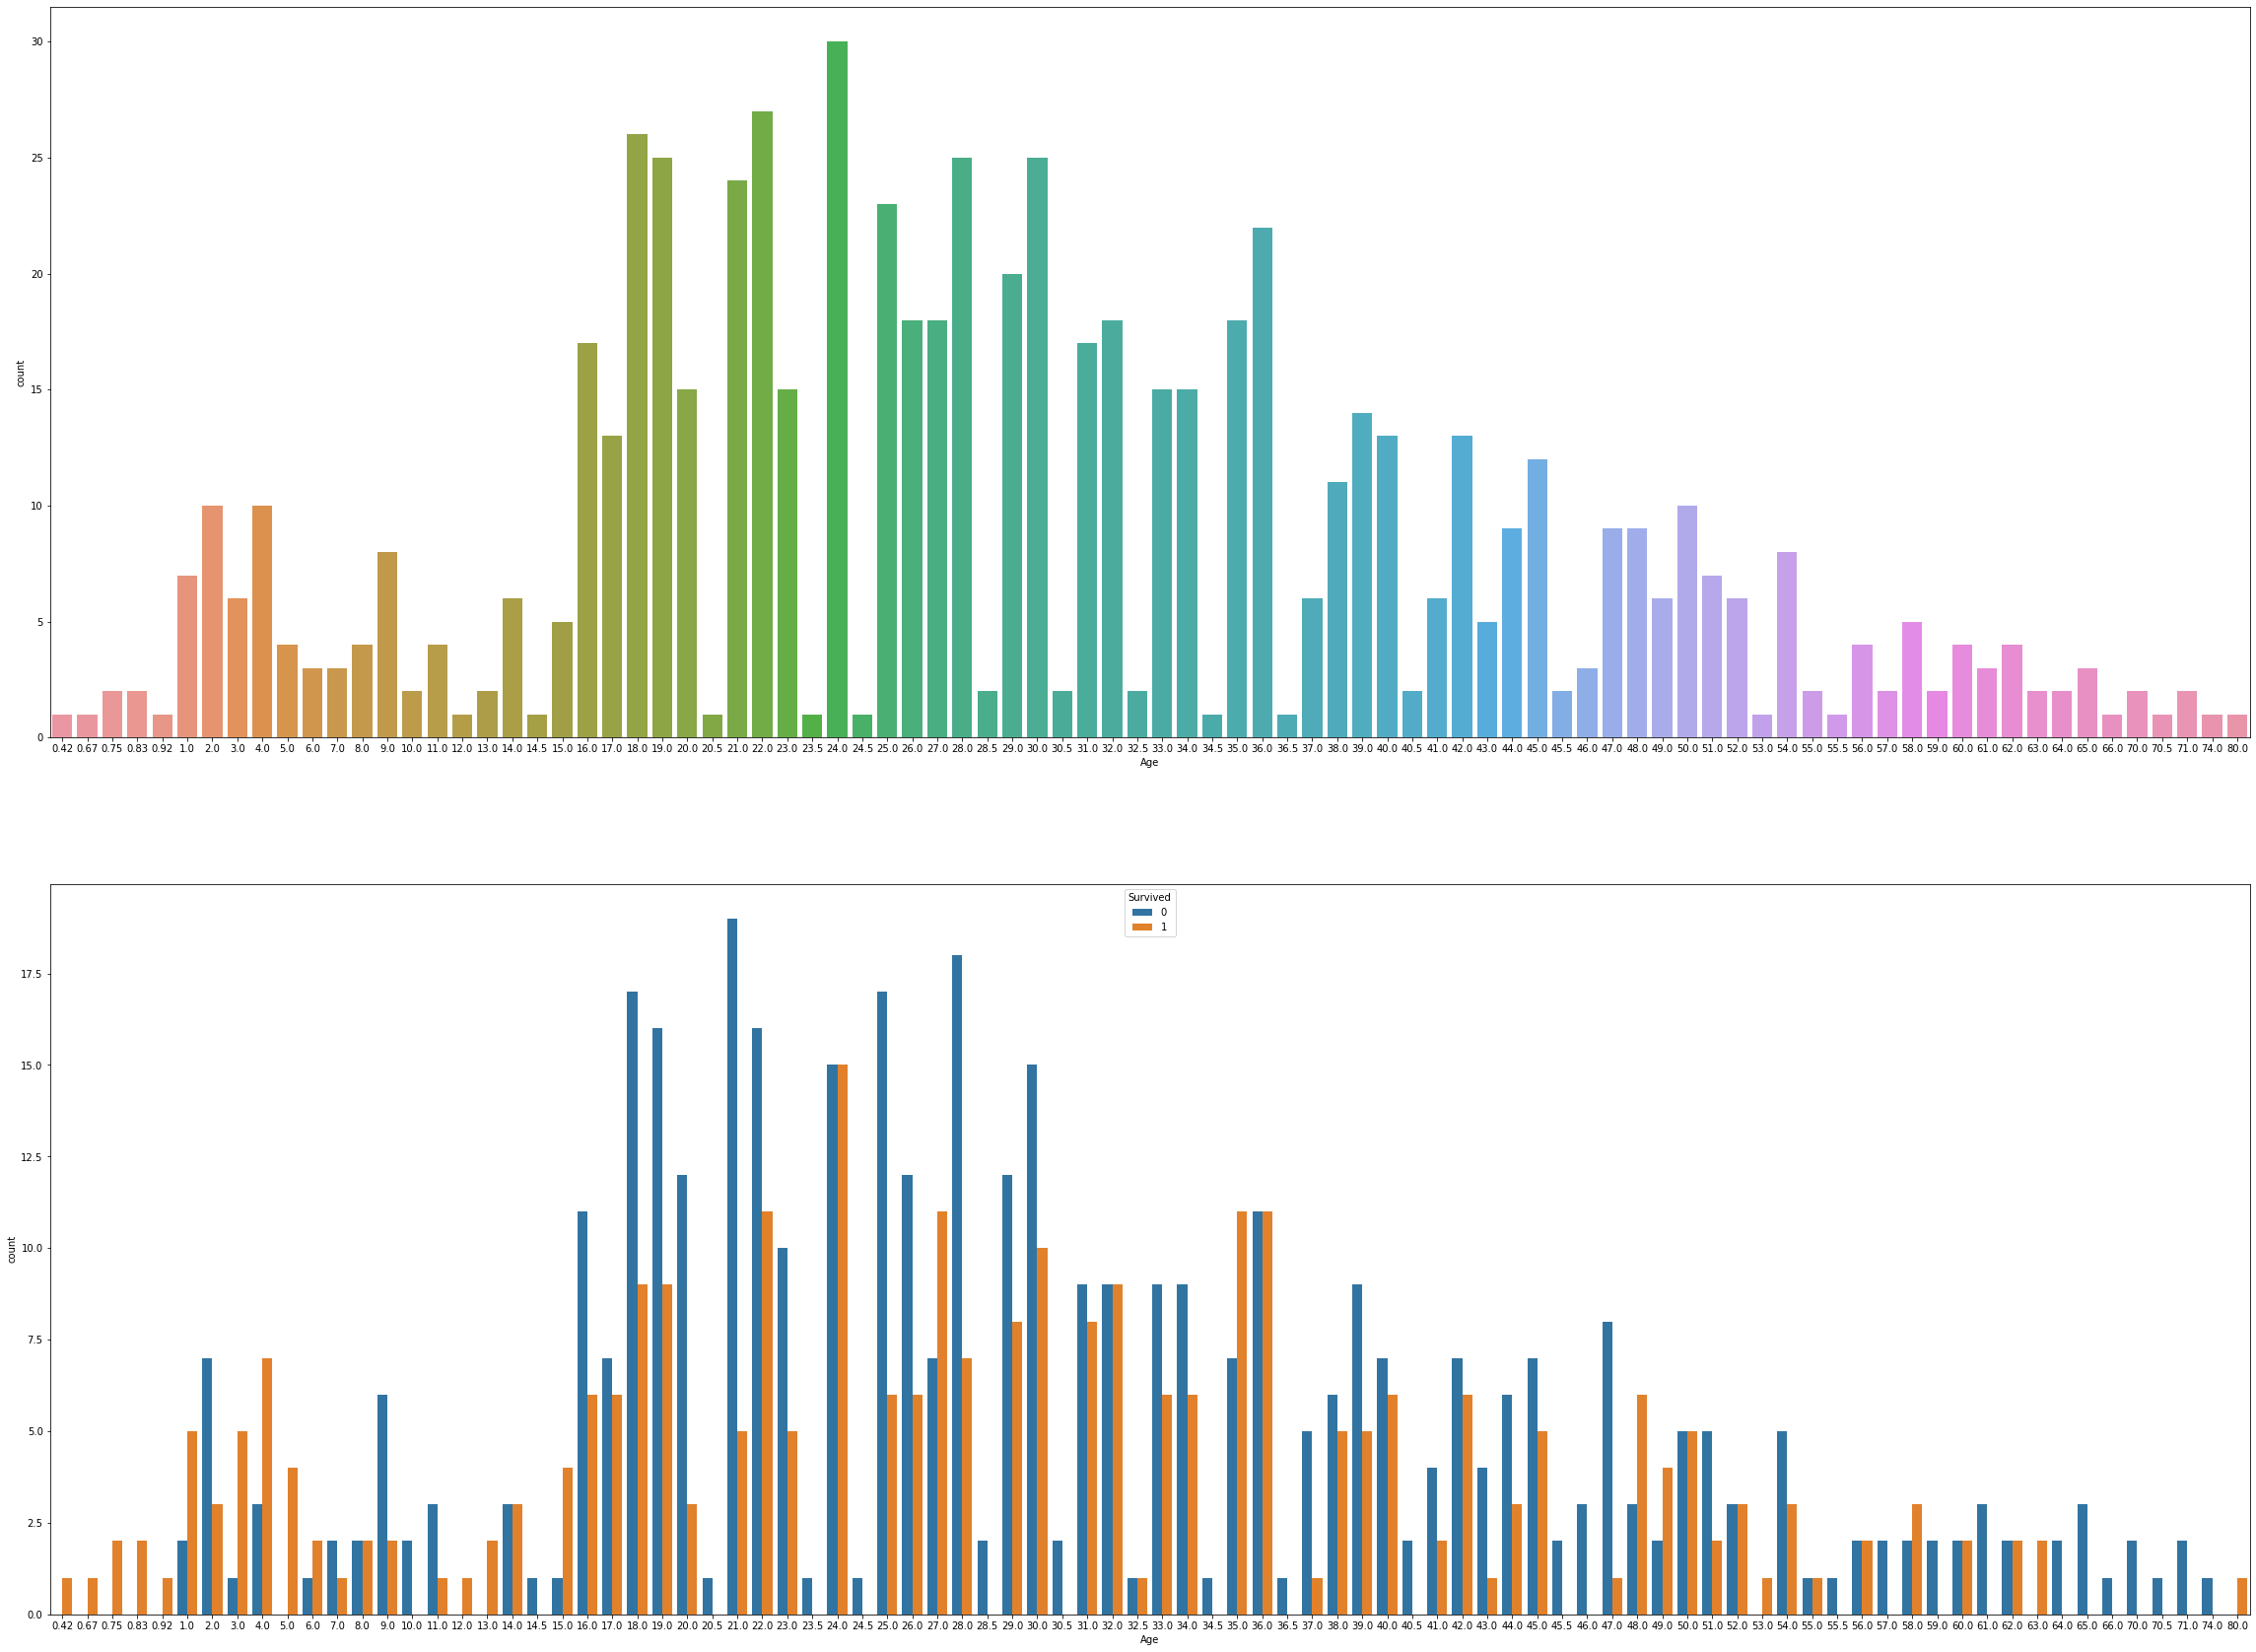

In [ ]:
plt.figure(figsize = [40,30])
plt.subplot(211)
sns.countplot(x='Age',data=training_set)
plt.subplot(212)
sns.countplot(x='Age',data=training_set,hue='Survived')

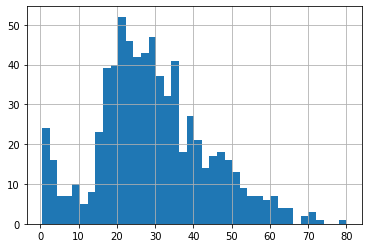

In [ ]:
training_set['Age'].hist(bins=40)

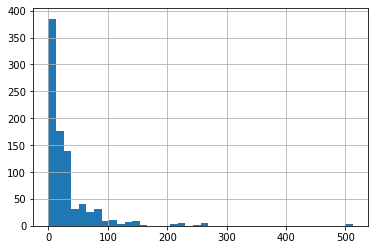

In [ ]:
training_set['Fare'].hist(bins = 40)

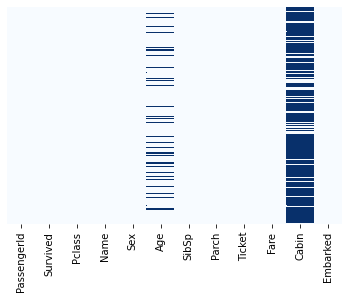

In [ ]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar = False,cmap = "Blues")

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
training_set.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


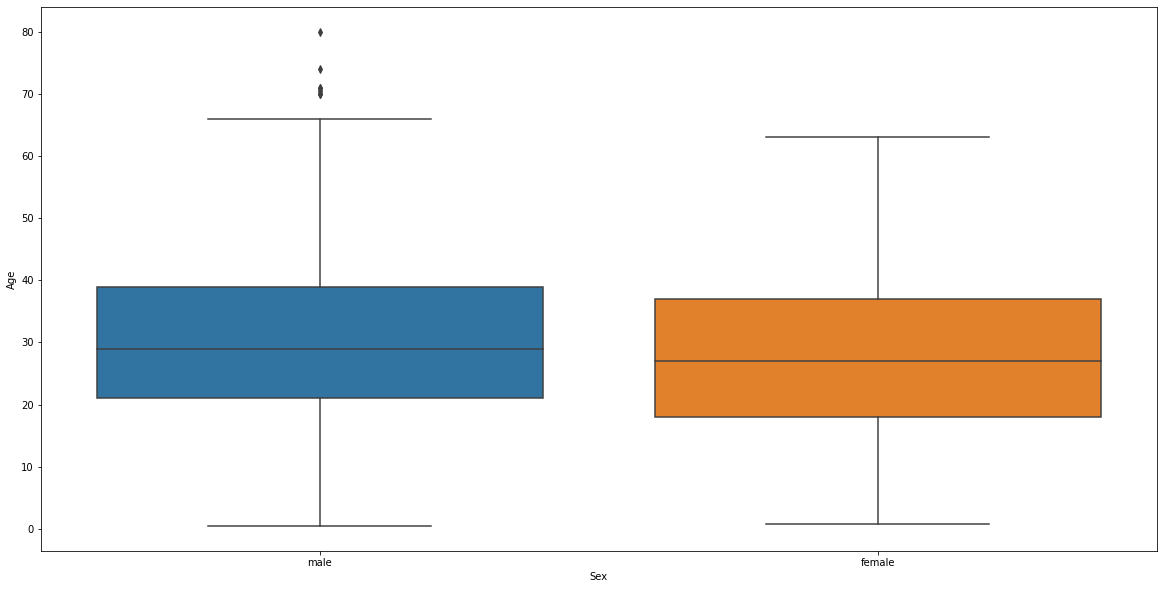

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Sex',y='Age',data=training_set)

In [ ]:
def Fill_Age(data):
  age = data[0]
  sex = data[1]
  if pd.isnull(age):
    if sex is 'male':
      return 29
    else: 
      return 25
  else: 
    return age
    

In [ ]:
training_set['Age']= training_set[['Age','Sex']].apply(Fill_Age,axis=1)

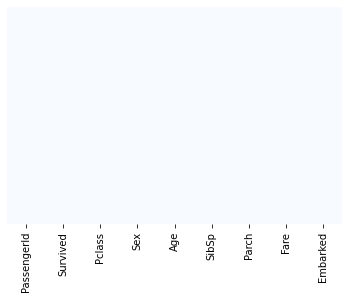

In [ ]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar = False,cmap = "Blues")

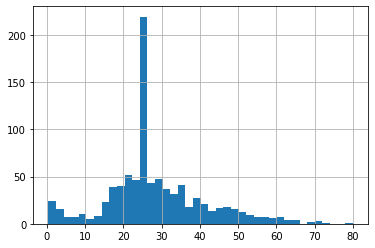

In [ ]:
training_set['Age'].hist(bins=40)

In [ ]:
training_set.drop('PassengerId',axis=1,inplace=True)

In [ ]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
training_set['Gender']=pd.get_dummies(training_set['Sex'],drop_first= True)

In [ ]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
training_set.drop('Sex',axis=1,inplace=True)

In [ ]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
training_set.drop('Embarked',axis=1,inplace= True)

In [ ]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [ ]:
X = training_set.drop('Survived',axis=1).values

In [ ]:
y = training_set['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[92, 18],
       [17, 52]])

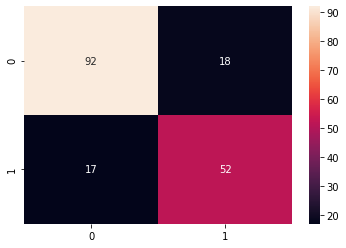

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')  

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



## Looks simple!! 